In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Normal Equation

In [13]:
class NormalEquation:
    def __init__(self, X, y):
        self.X = X.astype(float)
        self.y = y.astype(float)
        self.m = X.shape[0]        # no. of datas
        self.n = X.shape[1]        # no. of features
        self.theta = None
    
    def __get_L(self):
        '''
        if n = 3
        L = 0 0 0
            0 1 0
            0 0 1
        '''
        L = np.identity(self.n-1)
        L = np.insert(L, 0, np.zeros((L.shape[1])), axis=1)
        L = np.insert(L, 0, np.zeros((L.shape[1])), axis=0)
        return L
    
    def fit(self, lambda_):
        # General
        '''
        self.theta = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y
        '''
        # Regularized
        L = self.__get_L()
        self.theta = np.linalg.inv((self.X.T @ self.X) + (lambda_ * L)) @ self.X.T @ self.y
    
    def predict(self, X_test):
        return np.dot(X_test, self.theta)
    

### Examples

In [3]:
def add_ones(X):
    return np.insert(X, 0, np.ones((1, X.shape[0])), axis=1).astype(float)

#### n = 1 features

In [7]:
df1 = pd.read_csv('../datasets/Salary_Data.csv')
print(df1.info())
print(df1.describe())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [35]:
X = df1.iloc[:, 0].values.reshape(-1, 1)
y = df1.iloc[:, 1].values.reshape(-1, 1)

In [36]:
X_train = add_ones(X)
y_train = y

In [37]:
ne1 = NormalEquation(X_train, y_train)
ne1.fit(lambda_=1)
ne1.theta

array([[26006.26884422],
       [ 9409.67336683]])

In [38]:
y_pred = ne1.predict(X_train)

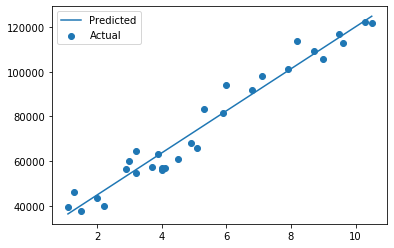

In [39]:
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, label='Predicted')
plt.legend()
plt.show()

#### n > 1 features

In [22]:
df2 = pd.read_csv('../datasets/50_startups.csv')
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
states, uniques = pd.factorize(df2['State'])
print(states)
print(uniques)

[0 1 2 0 2 0 1 2 0 1 2 1 2 1 2 0 1 0 2 0 1 0 2 2 0 1 2 0 2 0 2 0 1 2 1 0 2
 1 0 1 1 2 1 0 1 0 2 1 0 1]
Int64Index([0, 1, 2], dtype='int64')


In [41]:
df2['State'] = pd.factorize(df2['State'])[0]

In [42]:
X = df2.iloc[:, :4].values
y = df2.iloc[:, 4].values.reshape(-1, 1)

In [43]:
X_train = add_ones(X)
y_train = y

In [44]:
ne2 = NormalEquation(X_train, y_train)
ne2.fit(lambda_=100)
ne2.theta

array([[ 5.01034064e+04],
       [ 8.05796016e-01],
       [-2.68574709e-02],
       [ 2.71791797e-02],
       [ 2.87446418e+01]])

In [46]:
y_pred = ne2.predict(X_train)

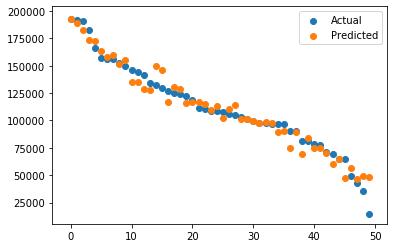

In [47]:
plt.scatter(np.arange(y.shape[0]), y, label='Actual')
plt.scatter(np.arange(y_pred.shape[0]), y_pred, label='Predicted')
plt.legend()
plt.show()

#### Polynomial Regression

In [48]:
df3 = pd.read_csv('../datasets/Position_Salaries.csv')
df3.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [49]:
X = df3.iloc[:, 1].values.reshape(-1, 1)
y = df3.iloc[:, 2].values.reshape(-1, 1)

In [50]:
X_train = add_ones(X)
y_train = y

In [51]:
X_train = np.append(X_train, np.power(X, 2), axis=1)
X_train = np.append(X_train, np.power(X, 3), axis=1)
X_train

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [52]:
ne3 = NormalEquation(X_train, y_train)
ne3.fit(lambda_=0.8)
ne3.theta

array([[ 23600.90053829],
       [ 63907.04221012],
       [-24895.45412593],
       [  2753.34000382]])

In [53]:
y_pred = ne3.predict(X_train)

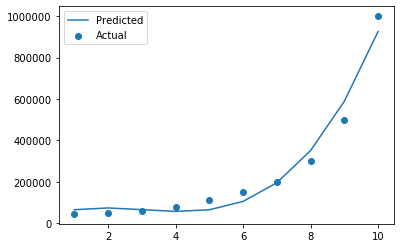

In [54]:
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, label='Predicted')
plt.legend()
plt.show()